# Principal Components Analysis vs. Linear Regression

In [17]:
import numpy as np
random_state = np. random . RandomState (0)
n_samples = 400
cov = [[3 , 3], [3, 4]]
X = random_state . multivariate_normal ( mean =[0 , 0], cov=cov , size = n_samples )



In [18]:
X

array([[-3.12306216e+00, -3.26740225e+00],
       [-2.77595836e+00, -9.29100996e-01],
       [-2.58241628e+00, -4.07234479e+00],
       [-1.49245333e+00, -1.92036067e+00],
       [-4.15286751e-02,  3.81165522e-01],
       [-9.89592957e-01,  3.55482720e-01],
       [-1.32100251e+00, -1.43191096e+00],
       [-9.06203041e-01, -7.20142632e-01],
       [-2.36396538e+00, -3.00551409e+00],
       [-7.62211620e-02, -9.84821384e-01],
       [ 3.88279978e+00,  5.26829472e+00],
       [-1.04556829e+00, -2.01182629e+00],
       [-3.00079377e+00, -5.06607288e+00],
       [ 2.10761911e-02, -1.71234929e-01],
       [-3.29321300e+00, -2.34804458e+00],
       [-4.51562515e-01, -1.36846726e-01],
       [ 2.49119905e+00,  8.65460061e-01],
       [ 4.94370320e-01,  7.47393098e-01],
       [-2.65519066e+00, -1.87460115e+00],
       [ 7.96527805e-01,  6.23543696e-01],
       [ 2.46720579e+00,  1.42467068e+00],
       [ 1.81274588e+00,  4.18372319e+00],
       [ 1.06891015e+00,  8.02830954e-01],
       [ 1.

In [33]:
#n_samples = 6

#Ein gedachtes y, das von beiden Komponenten mehr oder weniger linear abhängig ist.
y = X[:,0]*(X[:,1]/2)+X[:,1]*3 + random_state.normal( size = n_samples ) / 2



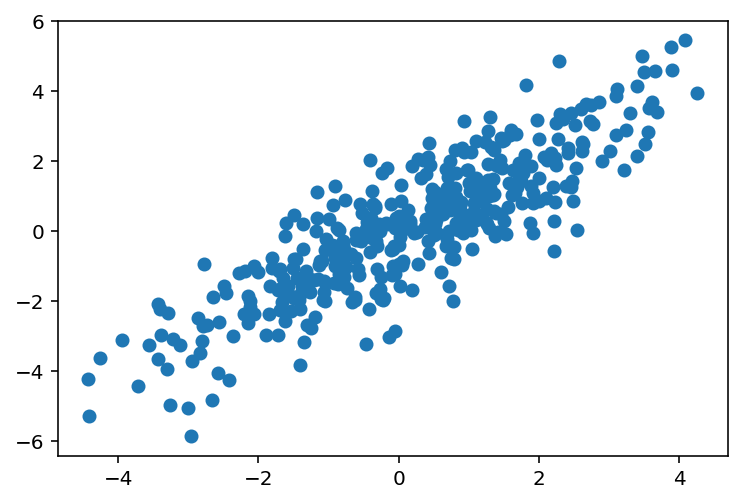

In [34]:
%matplotlib inline
%config InlineBackend.figure_formats = set(["retina"])
import requests
import matplotlib.pyplot as plt
#plt.plot(df['id'], df['QNH'])
plt.scatter(X[:,0], X[:,1])


In [21]:
from sklearn . decomposition import PCA
pca = PCA( n_components =2).fit(X)

In [22]:
# Das Folgende geht so nicht...
#y = X.dot(pca.components_ [1]) + random_state.normal( size = n_samples ) / 2
#...Man kann doch aus einem Modell keine Testdaten erzeugen, und dann behaupten, dass just dieses Modell besser sei.

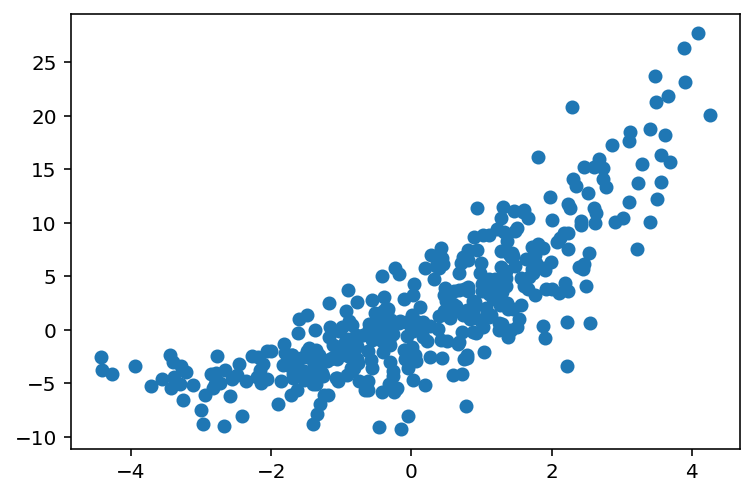

In [35]:
plt.scatter(X[:,0], y)

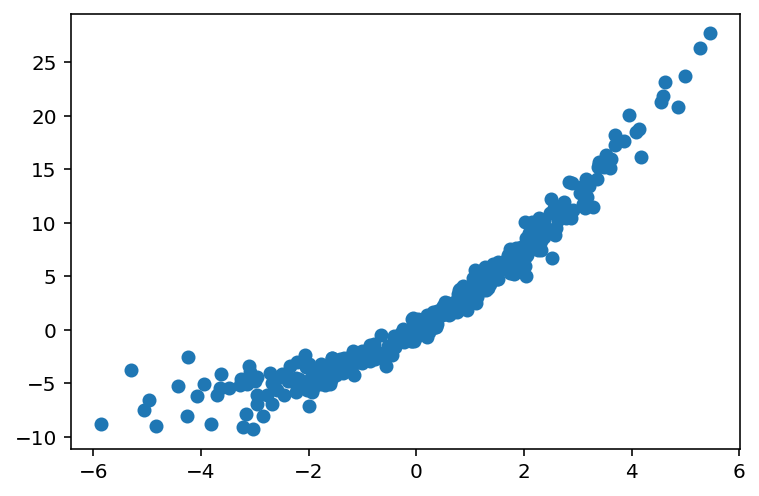

In [36]:
plt.scatter(X[:,1], y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split (X, y, random_state = 0 )

In [27]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression ( n_components =1)
pls .fit( X_train , y_train )

PLSRegression(n_components=1)

In [28]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression ()
lreg.fit( X_train , y_train )

LinearRegression()

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pcr = make_pipeline ( StandardScaler (), PCA( n_components =1), LinearRegression ())
pcr.fit( X_train , y_train )

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=1)),
                ('linearregression', LinearRegression())])

In [30]:
pcr.score(X_test, y_test)

0.7949361794057269

In [31]:
pls.score(X_test, y_test)

0.8035454041360892

In [32]:
lreg.score(X_test, y_test)

0.857673326571537

## Ergebnis: PLS und PCA sind ähnlich gut! - PCA ist nur sinnvoll zur Reduktion der Datenmenge